# Import

In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# 농업인 성별격차

Ref: [농림축산식품부 농업경영체 등록정보 현황서비스](https://edu.agrix.go.kr/uni_docs7/biOlap/dashBoard.do)

## 농업경영체 현황(농업인)_지역별 농업인 현황

> 농업인 중 성별로 차이가 있고, 경영주 및 공동경영주에서도 성별 차이 존재

In [106]:
dfs = []

years = range(2015, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체 현황(농업인)_지역별 농업인 현황.csv'
    df = pd.read_csv(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

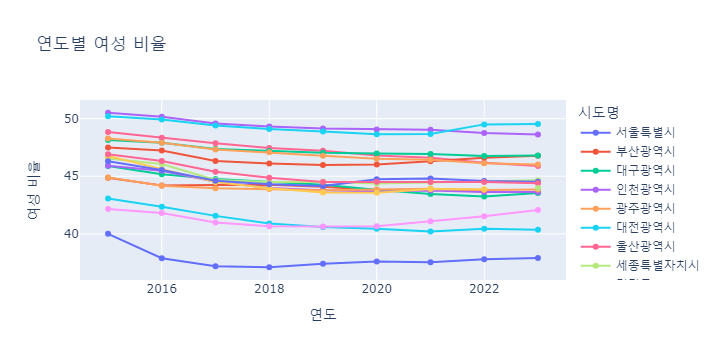

In [109]:
fig = px.line(df_all, x='연도', y='여성비율', color='시도명',
              title='연도별 여성 비율',
              labels={'연도': '연도', '여성비율': '여성 비율'},
              markers=True)
fig

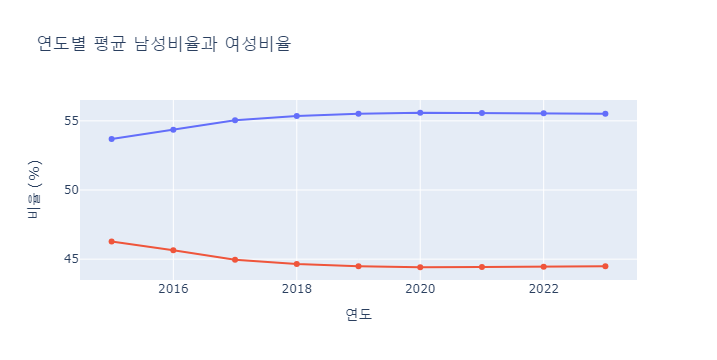

In [110]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True)
fig.update_layout(showlegend=False)
fig

## 농업경영체현황(농업인)_지역별현황(경영주)

In [76]:
dfs = []

years = range(2015, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체현황(농업인)_지역별현황(경영주).xlsx'
    df = pd.read_excel(file_path, header=1).iloc[:-1, :4]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수'})
    df = df.assign(남성비율 = round((df['남'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

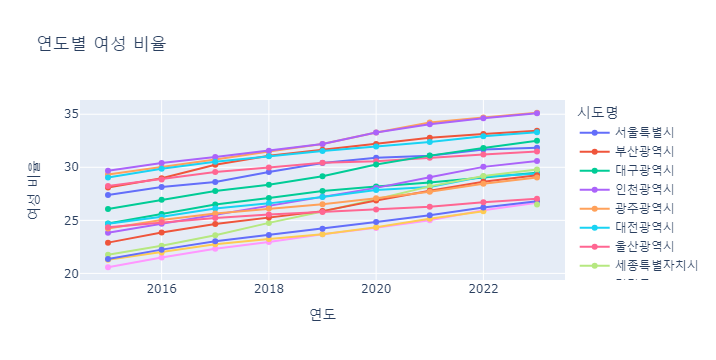

In [78]:
fig = px.line(df_all, x='연도', y='여성비율', color='시도명',
              title='연도별 여성 비율',
              labels={'연도': '연도', '여성비율': '여성 비율'},
              markers=True)
fig

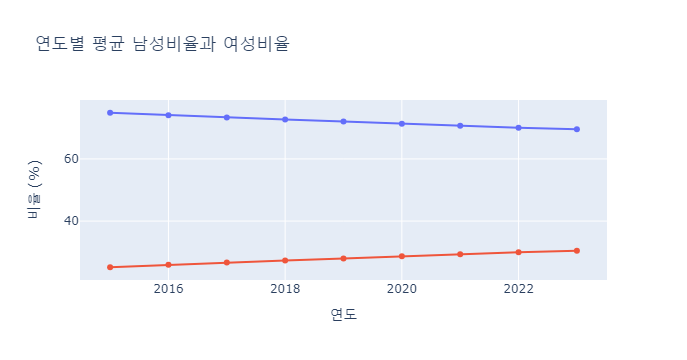

In [79]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True)
fig.update_layout(showlegend=False)
fig

## 농업경영체현황(농업인)_지역별공동경영주현황

In [101]:
dfs = []

years = range(2018, 2024)

for year in years:
    file_path = f'./dataset/Farm_dataset/{year}_농업경영체현황(농업인)_지역별공동경영주현황.xlsx'
    df = pd.read_excel(file_path, header=1).iloc[:-1, [0,1,2,11]]
    df = df.rename(columns={'Unnamed: 0': '시도명', 'Unnamed: 1': '농업인수','계':'남성','계.1':'여성'})
    df = df.assign(남성비율 = round((df['남성'] / df['농업인수'])*100, 2))
    df = df.assign(여성비율 = round((df['여성'] / df['농업인수'])*100, 2))
    df = df.assign(연도 = year)
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)

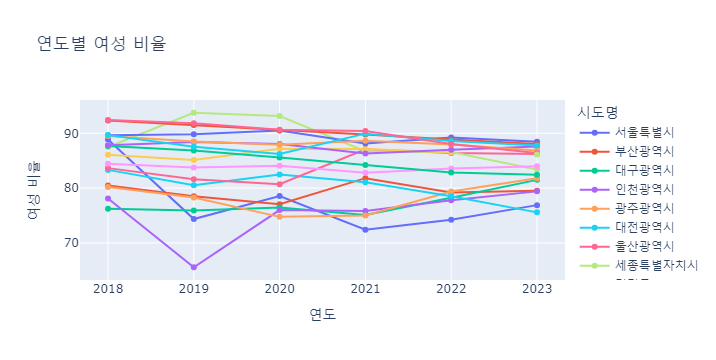

In [102]:
fig = px.line(df_all, x='연도', y='여성비율', color='시도명',
              title='연도별 여성 비율',
              labels={'연도': '연도', '여성비율': '여성 비율'},
              markers=True)
fig

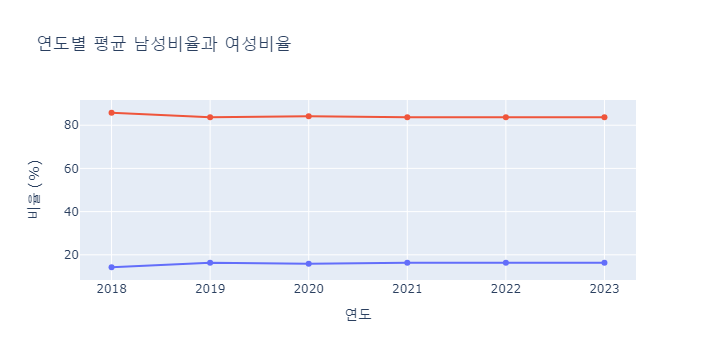

In [103]:
df_avg = df_all.groupby('연도').agg({
    '남성비율': 'mean',
    '여성비율': 'mean'
}).reset_index()
fig = px.line(df_avg, x='연도', y=['남성비율', '여성비율'],
              title='연도별 평균 남성비율과 여성비율',
              labels={'연도': '연도', 'value': '비율 (%)'},
              markers=True)
fig.update_layout(showlegend=False)
fig

# 여성농업인 소득

# 여성농업인 지위

Ref: [국가농식물통계서비스](https://kass.mafra.go.kr/newkass/kas/sti/sti/themeConfmStats.do?trg=001)

- 연령별

In [111]:
df = pd.read_csv('dataset/Farm_dataset/2022_거주_지역사회에서_여성의_지위_인식.csv',header=1).iloc[7:11,1:]

In [112]:
age_groups = df['구분(2)']
values = df.set_index('구분(2)').drop(columns='사례수 (명)')

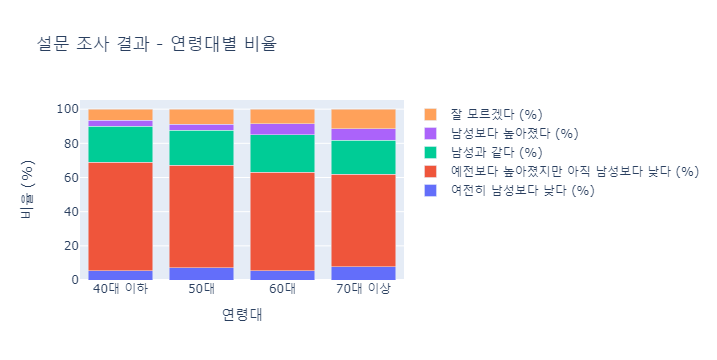

In [113]:
fig = go.Figure()

for column in values.columns:
    fig.add_trace(go.Bar(
        x=age_groups,
        y=values[column],
        name=column
    ))
fig.update_layout(
    title='설문 조사 결과 - 연령대별 비율',
    xaxis_title='연령대',
    yaxis_title='비율 (%)',
    barmode='stack'
)

fig

In [114]:
df = pd.read_csv('dataset/Farm_dataset/2022_거주_지역사회에서_여성의_지위_인식.csv',header=1).iloc[4:7,1:]

In [115]:
age_groups = df['구분(2)']
values = df.set_index('구분(2)').drop(columns='사례수 (명)')

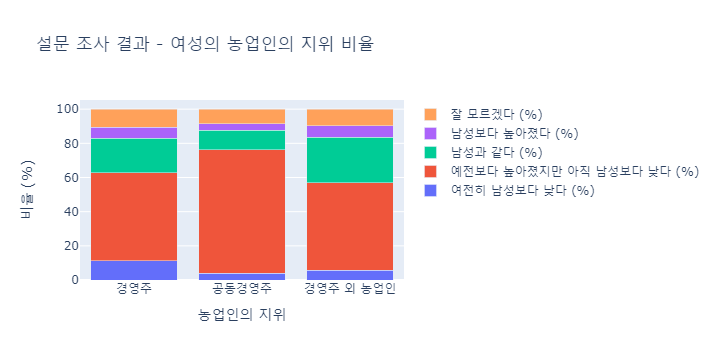

In [116]:
fig = go.Figure()

for column in values.columns:
    fig.add_trace(go.Bar(
        x=age_groups,
        y=values[column],
        name=column
    ))
fig.update_layout(
    title='설문 조사 결과 - 여성의 농업인의 지위 비율',
    xaxis_title='농업인의 지위',
    yaxis_title='비율 (%)',
    barmode='stack'
)

fig

# 여성농업인 역량

In [130]:
df = pd.read_csv('./dataset/Farm_dataset/2023_교육_참여를_위한_개선_필요사항.csv',header=1).iloc[[6,7,8,9],1:]

In [145]:
df

,구분(2),사례수 (명),다양한 교육과정 개발 (%),단계별 수준별 강좌 개설 (%),여성농업인에 대한 이해 높은 강사 확대 (%),참여형 교육 확대 (%),교육시기 시간대 다양화 (%),교육장소 접근성 개선 (%),온라인 교육 확대 (%),교육시간내 자녀돌봄 서비스 제공 (%),충분한 교육정보 제공 (%),없음 (%)
6,40대 이하,125,15.8,13.0,9.2,13.3,14.2,9.8,8.9,4.1,7.9,3.9
7,50대,296,20.0,16.6,20.7,11.1,14.6,9.9,4.1,0.4,2.4,0.2
8,60대,821,16.2,13.9,18.7,9.1,19.0,14.8,1.5,0.1,5.4,1.4
9,70대 이상,761,13.4,10.5,15.9,8.7,18.4,23.3,0.9,0.4,4.9,3.6


6    40대 이하
7       50대
8       60대
9    70대 이상
Name: 구분(2), dtype: object

In [ ]:
fig = go.Figure()

for age_group in df['구분(2)']:
    fig.add_trace(go.Pie(
        labels=df.columns[:], 
        values=df[df['구분(2)'] == age_group].iloc[0, 1:],
        name=age_group,
        hole=0.3,  # Donut chart
        textinfo='label+percent',
        showlegend=False  # 하나의 범례로 대체
    ))

# 레이아웃 설정
fig.update_layout(
    title_text='연령대별 교육 개선 사항 비율',
    grid=dict(rows=2, columns=2),
    annotations=[dict(text=age_group, x=0.5, y=0.5, font_size=20, showarrow=False)
                 for age_group in df['구분']],
    height=800,
    width=800,
)

# 전체 파이 차트를 보기 좋게 배열
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")

# 그래프 출력
fig.show()